# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('preprocessed_data.csv')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [3]:
data.columns
all_features=[]

In [4]:
#separating Y values and drop y from x
y=data['project_is_approved'].values
X=data.drop('project_is_approved',axis=1)

In [5]:
# 1. Split your data. for CV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [6]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [7]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data
all_features.append(vectorizer.get_feature_names())
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)



In [8]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)

X_train_essay_Tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_Tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_Tfidf = vectorizer.transform(X_test['essay'].values)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [9]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().
vectorizer = CountVectorizer(binary=True)#one hot encoding
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data
all_features.append(vectorizer.get_feature_names())

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)




In [10]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data
all_features.append(vectorizer.get_feature_names())

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)


In [11]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data
all_features.append(vectorizer.get_feature_names())

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)


In [12]:
from sklearn.preprocessing import Normalizer
standard_vector1=Normalizer()
standard_vector1.fit(X_train.price.values.reshape(-1,1))

X_train_price_norm=standard_vector1.transform(X_train.price.values.reshape(-1,1))
X_cv_price_norm=standard_vector1.transform(X_cv.price.values.reshape(-1,1))
X_test_price_norm=standard_vector1.transform(X_test.price.values.reshape(-1,1))

In [13]:
# 6. For set 1 stack up all the features using hstack()
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()


In [14]:
# 7. For set 2 stack up all the features using hstack()
X_tr_tfidf = hstack((X_train_essay_Tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_Tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_Tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()


In [15]:
all_featrues_final=[]
for i in all_features:
    all_featrues_final.extend(i)
all_featrues_final.append('Price')
print(len(all_featrues_final))
print(X_tr_bow.shape)

5061
(49041, 5061)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [16]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
details_from_set1=['BOW','Brute']
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
import numpy as np
def AUC_alpha(x_train,y_train,x_test,y_test):
    AUC_train,AUC_test=[],[]
    alpha= [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
    for i in alpha:
        clf = MultinomialNB(alpha=i)
        clf.fit(x_train,y_train)
        y_pred_train=clf.predict(x_train)
        AUC_train.append(roc_auc_score(y_train,y_pred_train))
        y_pred=clf.predict(x_test)
        AUC_test.append(roc_auc_score(y_test,y_pred))    
    return AUC_train,AUC_test,alpha


In [17]:
AUC_train,AUC_test,alpha_train=AUC_alpha(X_tr_bow,y_train,X_te_bow,y_test)
#AUC_cv,alpha_cv=AUC_alpha(X_tr_bow,y_train)
#AUC_test,alpha_test=AUC_alpha(X_te_bow,y_test)


In [18]:
def area(tpr,fpr):
    import numpy as np
    area=np.trapz(tpr,fpr)
    return area

In [19]:
import matplotlib.pyplot as plt
def plot(AUC_train,alpha_train,AUC_test,alpha_test):
    plt.plot(alpha_train,AUC_train,marker='o',label="Train")
    plt.plot(alpha_test,AUC_test,label="Test",marker='s')
    plt.legend()
    plt.xlabel('Alpha')
    plt.ylabel('AUC')
    plt.title(' ALPHA VS AUC')
    plt.grid()
    plt.show()

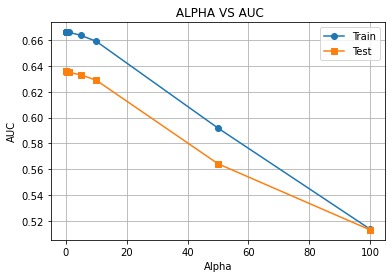

In [20]:
plot(AUC_train,alpha_train,AUC_test,alpha_train)

In [21]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
#Now from the above graph plot i am going to use alpha = 3
a=3
clf = MultinomialNB(alpha=a)
details_from_set1.append(a)
clf.fit(X_tr_bow,y_train)
y_pred_train=clf.predict(X_tr_bow)
y_pred_test=clf.predict(X_te_bow)
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp=confusion_matrix(y_train,y_pred_train).ravel()
tn_t, fp_t, fn_t, tp_t=confusion_matrix(y_test,y_pred_test).ravel()
new_proba_train=clf.predict_proba(X_tr_bow)
new_proba_test=clf.predict_proba(X_te_bow)

In [22]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
from sklearn.metrics import roc_curve
fpr,tpr,th=roc_curve(y_train,new_proba_train[:,1])

fpr_t,tpr_t,th_t=roc_curve(y_test,new_proba_test[:,1])



def get_max(fpr,tpr,th):
    temp=0
    ind=0
    for i,j in zip(fpr,tpr):
        temp1=abs(j*(1-i))
        if temp<temp1:
            temp=temp1
            req=th[ind]
        ind=ind+1
    return req
#print(fpr,tpr,th)
#print(fpr_t,tpr_t,th_t)
print(f'Best thershold value for train data is {get_max(fpr,tpr,th)}')
print(f'Best thershold value for train data is {get_max(fpr_t,tpr_t,th_t)}')

#print(f'Best Theshold value for test data is  {get_max(fpr_t,tpr_t,th_t)}')
#print(f'Best Theshold value for test data is  {get_max(fpr_tn,tpr_tn,th_tn)}')




Best thershold value for train data is 0.8513212151145712
Best thershold value for train data is 0.8525498387695429


In [23]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
y_pred_train = (clf.predict_proba(X_tr_bow)[:,1] >= get_max(fpr,tpr,th)).astype(bool)
Y_pred_test = (clf.predict_proba(X_te_bow)[:,1] >=  get_max(fpr_t,tpr_t,th_t)).astype(bool)
con=confusion_matrix(y_train,y_pred_train)
con_2=confusion_matrix(y_test,y_pred_test)

print(f'Train confusin matrix \n{con}')
print(f'Test confusin matrix \n{con_2}')


Train confusin matrix 
[[ 5075  2351]
 [14296 27319]]
Test confusin matrix 
[[ 2917  2542]
 [ 8130 22463]]


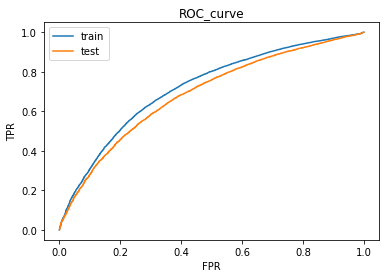

 For train data the Roc score is 0.6699398323136956
 For Test data the Roc score  is  0.6342999418342398


In [24]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.plot(fpr,tpr,label='train')
plt.plot(fpr_t,tpr_t,label='test')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.show()
print(f' For train data the Roc score is {roc_auc_score(y_train,y_pred_train)}')
print(f' For Test data the Roc score  is  {roc_auc_score(y_test,y_pred_test)}')
details_from_set1.append(roc_auc_score(y_test,y_pred_test))

In [25]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
#printing top 20 features from
pos=clf.feature_log_prob_[1]
neg=clf.feature_log_prob_[0]
top_20_pos_index=np.argsort(pos)[:20]
top_20_neg_index=np.argsort(neg)[:20]
n=np.array(all_featrues_final)
print(f' Top 20 features for set 1 associated with the possitive points \n\n{n[top_20_pos_index]}\n\n')
print(f'Top 20 features for set 1 associated with the negative  points  \n\n{n[top_20_neg_index]}')

 Top 20 features for set 1 associated with the possitive points 

['dr' 'vt' 'wy' 'nd' 'mt' 'sd' 'ne' 'ri' 'nh' 'ak' 'de' 'dc' 'hi' 'me'
 'nm' 'wv' 'students use materials' 'these materials allow' 'my scholars'
 'materials allow students']


Top 20 features for set 1 associated with the negative  points  

['dr' 'nd' 'vt' 'wy' 'the wobble' 'de' 'chromebooks allow' 'stools allow'
 'calculator' 'sturdy' 'chromebooks would' 'graphing' 'stories read'
 'these chromebooks' 'chromebooks students' 'chairs help'
 'the chromebooks' 'chromebooks classroom' 'balance balls' 'these chairs']


#### Set 2

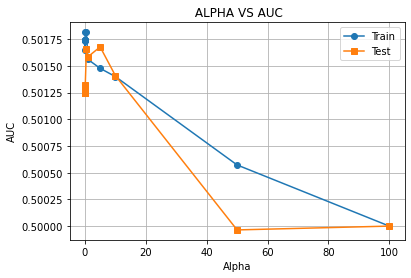

In [26]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
details_from_set2=['TFIDF','Brute']
AUC_train_TFIDF,AUC_test_TFIDF,alpha_train_TFIDF=AUC_alpha(X_tr_tfidf,y_train,X_te_tfidf,y_test)
plot(AUC_train_TFIDF,alpha_train,AUC_test_TFIDF,alpha_train_TFIDF)

In [27]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
a=3
clf = MultinomialNB(alpha=a)
details_from_set2.append(a)
clf.fit(X_tr_tfidf,y_train)
y_pred_train=clf.predict(X_tr_tfidf)
y_pred_test=clf.predict(X_te_tfidf)
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp=confusion_matrix(y_train,y_pred_train).ravel()
tn_t, fp_t, fn_t, tp_t=confusion_matrix(y_test,y_pred_test).ravel()
new_proba_train=clf.predict_proba(X_tr_tfidf)
new_proba_test=clf.predict_proba(X_te_tfidf)



In [28]:
from sklearn.metrics import roc_curve
fpr,tpr,th=roc_curve(y_train,new_proba_train[:,1])
fpr_t,tpr_t,th_t=roc_curve(y_test,new_proba_test[:,1])
def get_max(fpr,tpr,th):
    temp=0
    ind=0
    for i,j in zip(fpr,tpr):
        temp1=abs(j*(1-i))
        if temp<temp1:
            temp=temp1
            req=th[ind]
        ind=ind+1
    return req
#print(fpr,tpr,th)
#print(fpr_t,tpr_t,th_t)
print(f'Best thershold value for train data is {get_max(fpr,tpr,th)}')
print(f'Best Theshold value for test data is  {get_max(fpr_t,tpr_t,th_t)}')

Best thershold value for train data is 0.8644287312534038
Best Theshold value for test data is  0.8630246493413569


In [29]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

y_pred_train = (clf.predict_proba(X_tr_tfidf)[:,1] >= get_max(fpr,tpr,th)).astype(bool)
Y_pred_test = (clf.predict_proba(X_te_tfidf)[:,1] >=  get_max(fpr_t,tpr_t,th_t)).astype(bool)
con=confusion_matrix(y_train,y_pred_train)
con_2=confusion_matrix(y_test,y_pred_test)
print(f'Train confusin matrix \n{con}')
print(f'Test confusin matrix \n{con_2}')

Train confusin matrix 
[[ 4919  2507]
 [14376 27239]]
Test confusin matrix 
[[   58  5401]
 [  221 30372]]


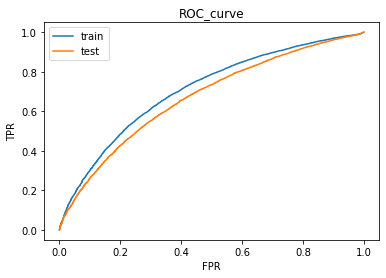

 For train data the Roc score is 0.6584750045618107
 For Test data the Roc score  is  0.501700390893956


In [30]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
plt.plot(fpr,tpr,label='train')
plt.plot(fpr_t,tpr_t,label='test')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.show()
print(f' For train data the Roc score is {roc_auc_score(y_train,y_pred_train)}')
print(f' For Test data the Roc score  is  {roc_auc_score(y_test,y_pred_test)}')
details_from_set2.append(roc_auc_score(y_test,y_pred_test))

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [31]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
req_details=['Vectorizer','Model','Hyperparameter','AUC']

In [32]:
from prettytable import PrettyTable
x = PrettyTable()


In [33]:
x.field_names=req_details
x.add_row(details_from_set1)
x.add_row(details_from_set2)

In [34]:
print(x)

+------------+-------+----------------+--------------------+
| Vectorizer | Model | Hyperparameter |        AUC         |
+------------+-------+----------------+--------------------+
|    BOW     | Brute |       3        | 0.6342999418342398 |
|   TFIDF    | Brute |       3        | 0.501700390893956  |
+------------+-------+----------------+--------------------+


#summary:
1.From the above plots i can say that BOW worked more effectively than the TFIDF
2.We can improve the performance of the model by using other techniques such as w2v
